# Loan Prediction With Hyper-Parameter Tuning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_location="C:\\Users\\Work Only\\Downloads\\train_ctrUa4K (3).csv"
loan=pd.read_csv(file_location)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.select_dtypes(include='object').nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [6]:
loan.drop('Loan_ID',axis=1,inplace=True)

In [7]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

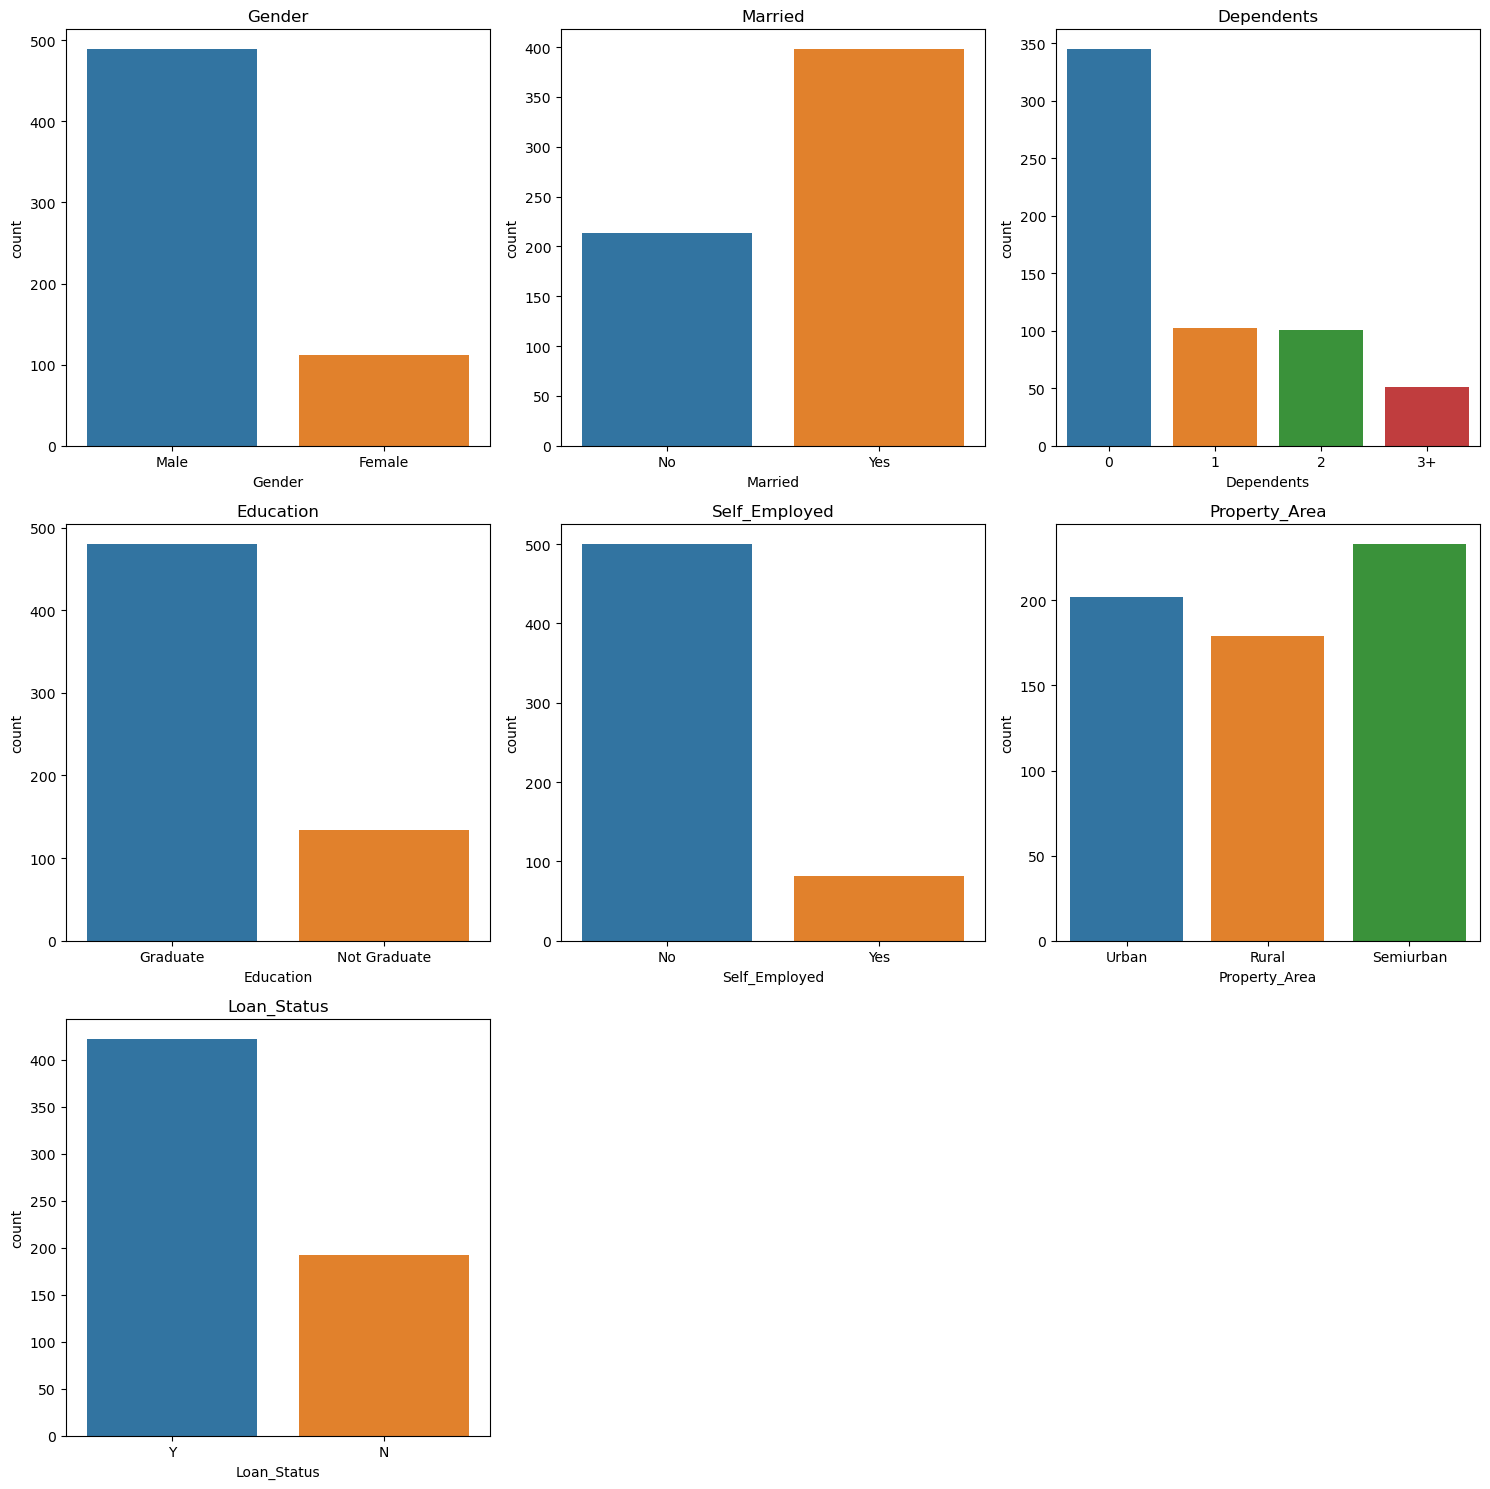

In [6]:
cat_cols=loan.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    top=loan[column].value_counts().nlargest(6).index
    filtered=loan[loan[column].isin(top)]
    sns.countplot(data=filtered,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

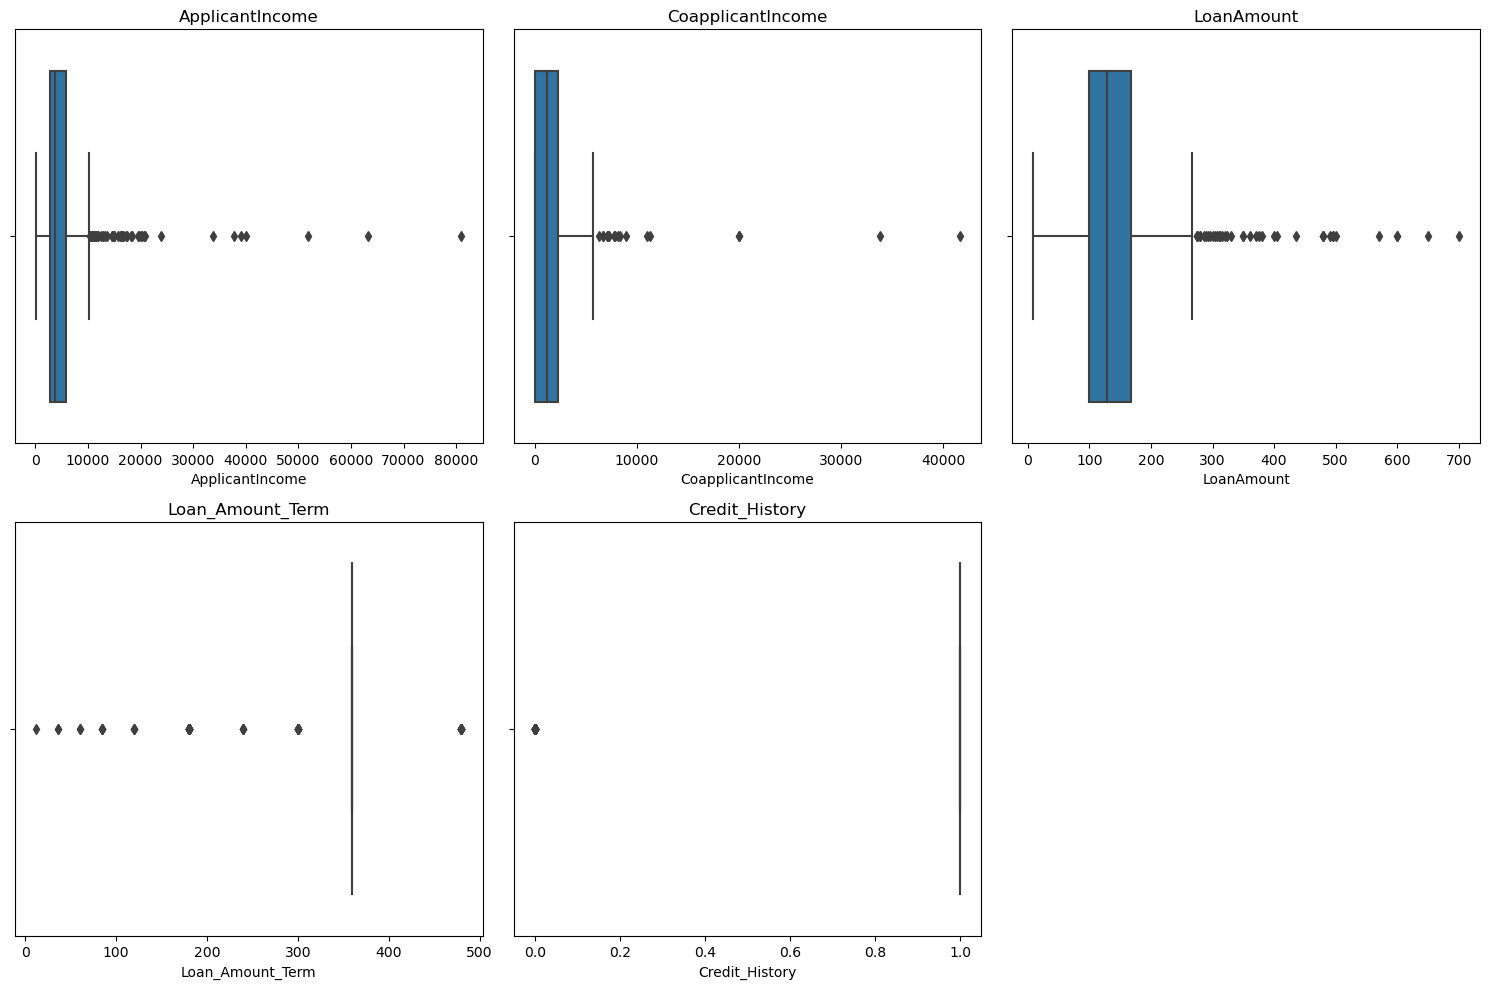

In [7]:
numerical_cols=loan.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_cols):
    sns.boxplot(data=loan,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

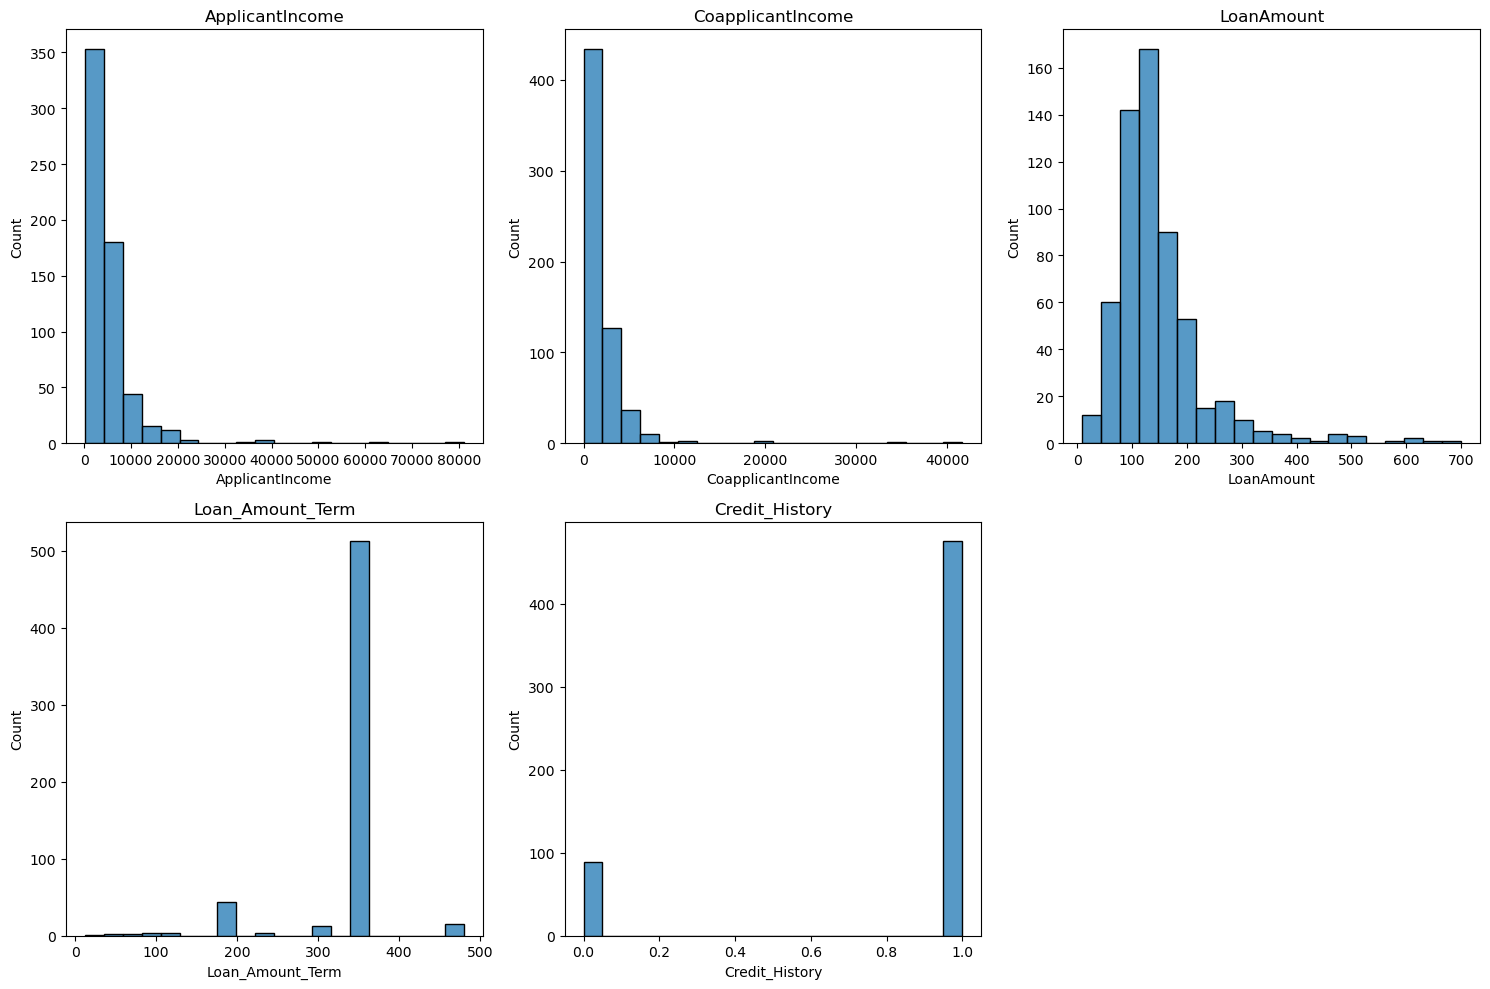

In [13]:
numerical_cols=loan.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_cols):
    sns.histplot(data=loan,x=column,ax=ax[i],bins=20)
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

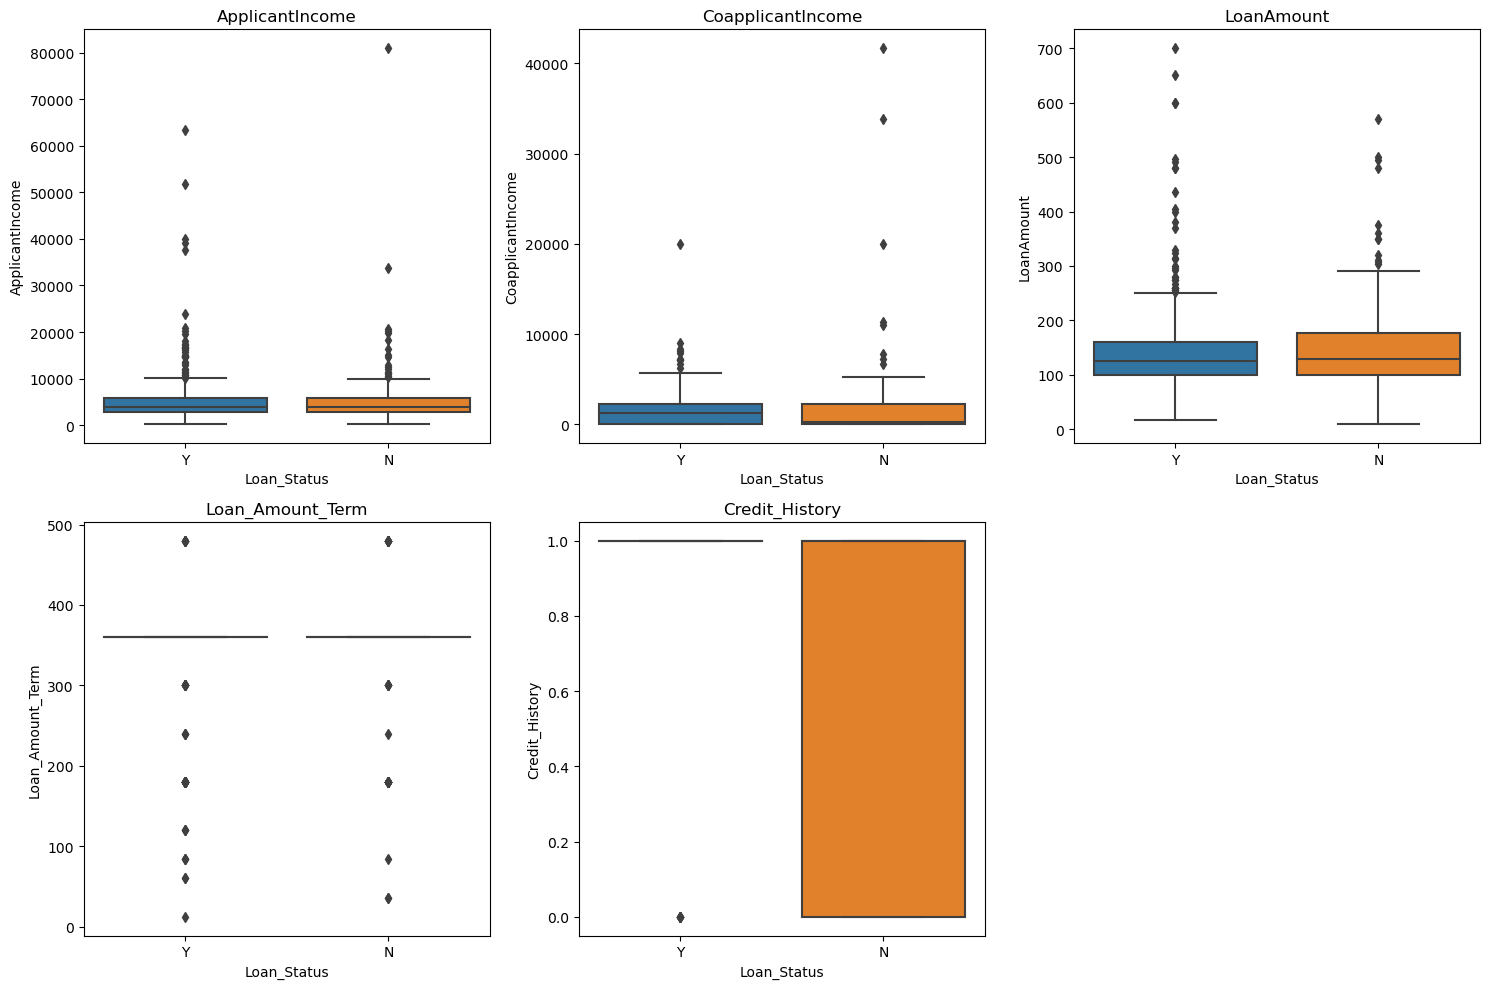

In [11]:
numerical_col=loan.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_col)
num_rows=(num_cols +2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_col):
    sns.boxplot(data=loan,x='Loan_Status',y=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

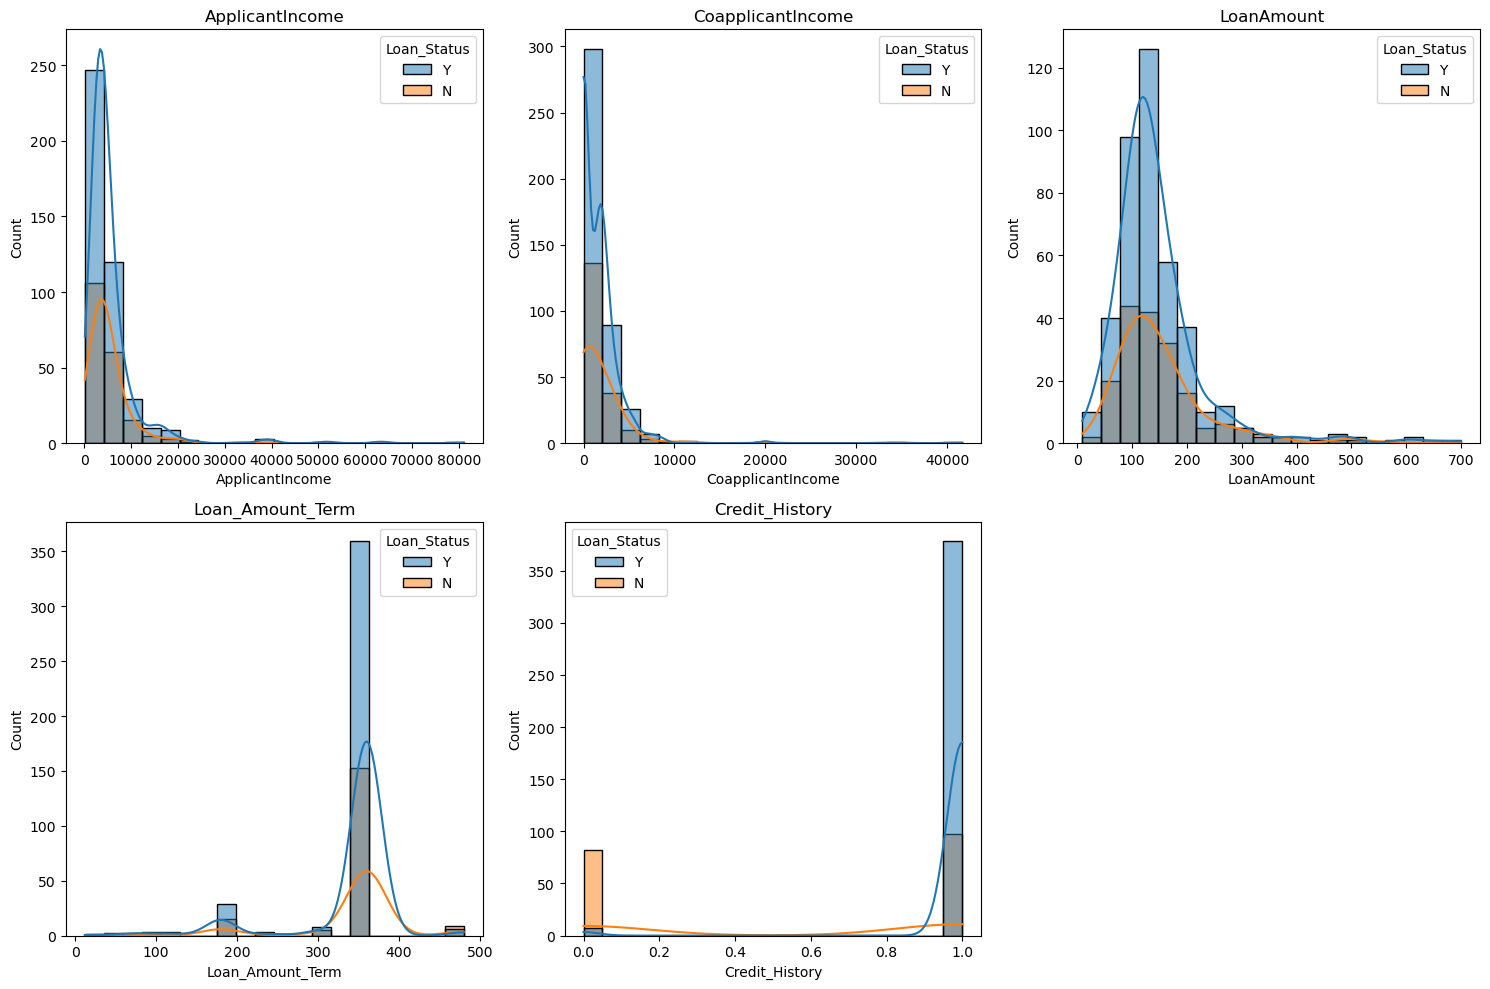

In [14]:
numerical_cols=loan.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_cols):
    sns.histplot(data=loan,x=column,ax=ax[i],bins=20,kde=True,hue='Loan_Status')
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

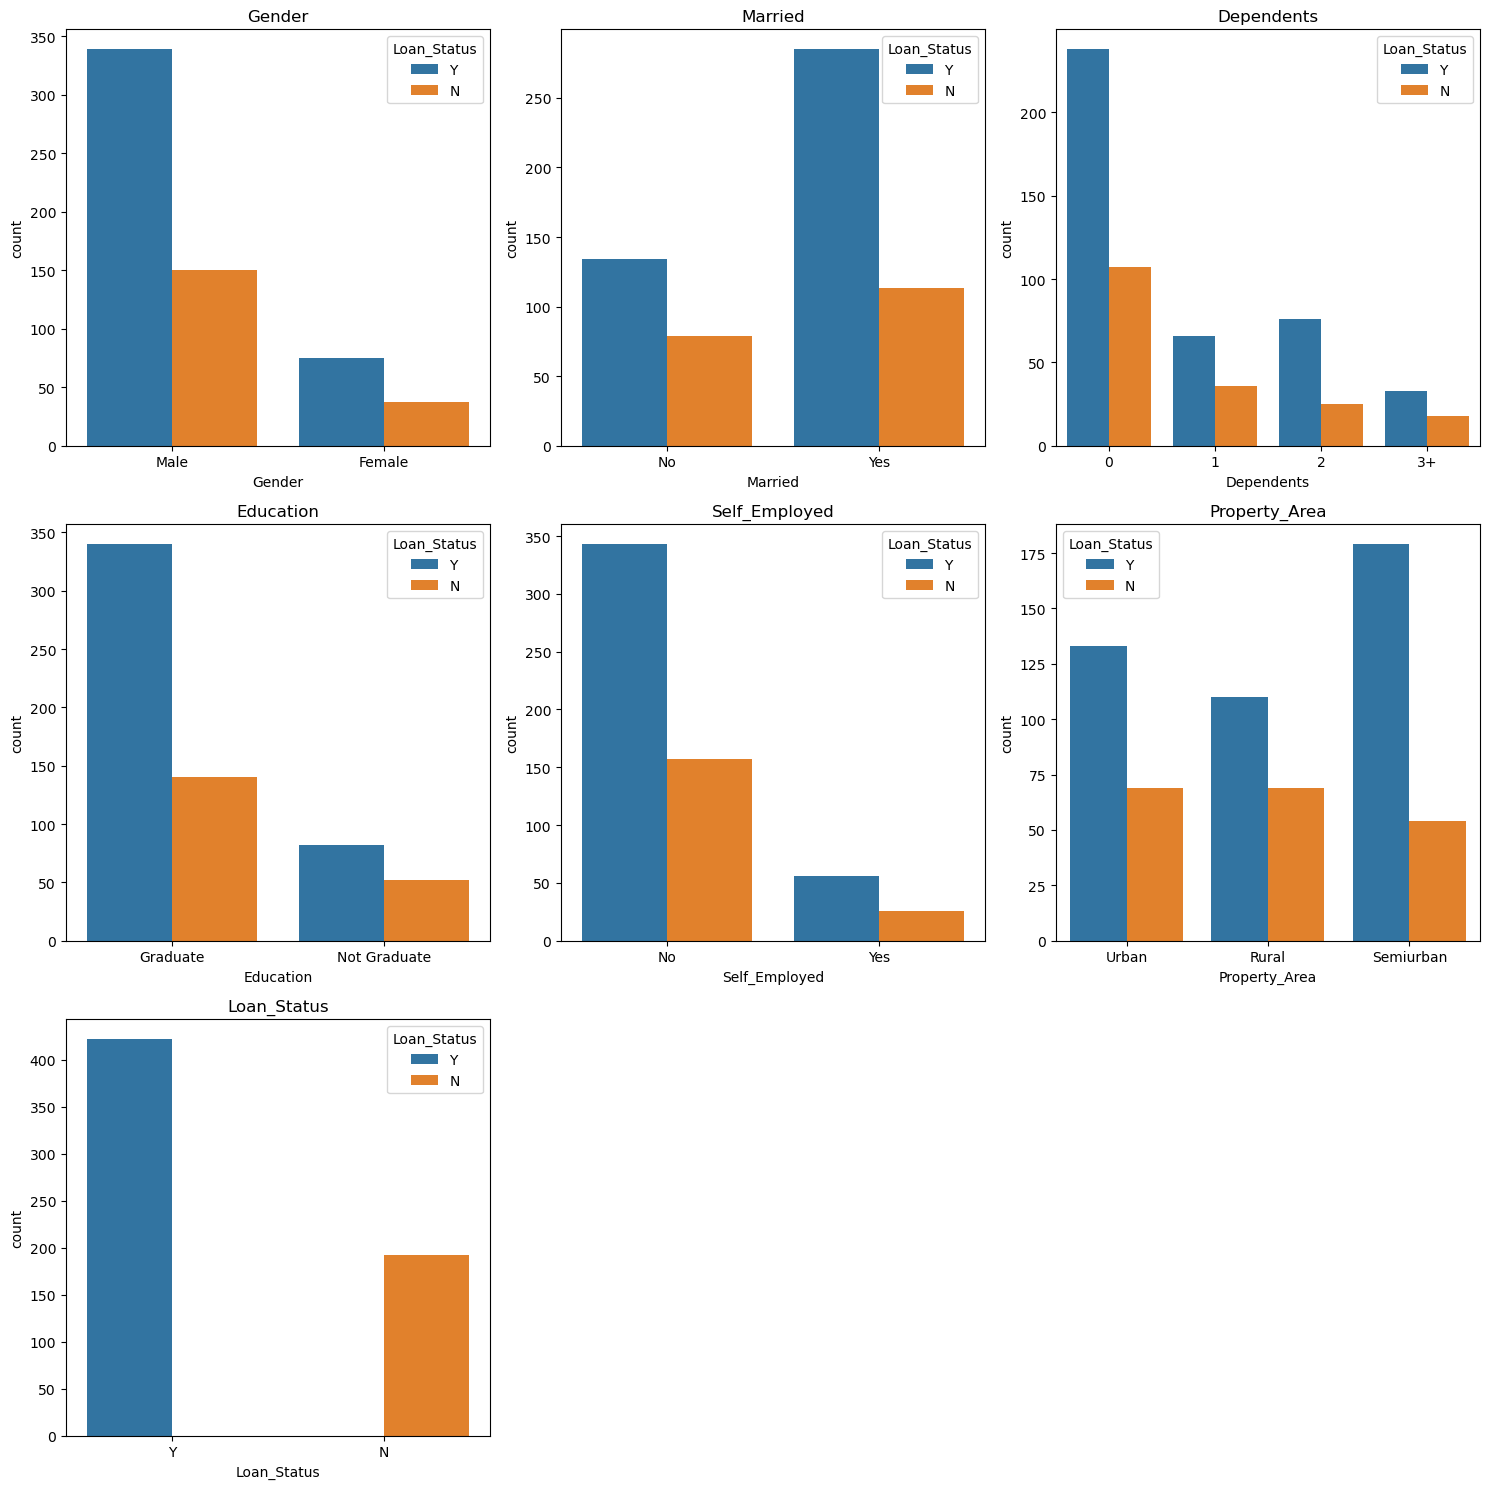

In [16]:
cat_cols=loan.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    top=loan[column].value_counts().nlargest(6).index
    filtered=loan[loan[column].isin(top)]
    sns.countplot(data=filtered,x=column,ax=ax[i],hue='Loan_Status')
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

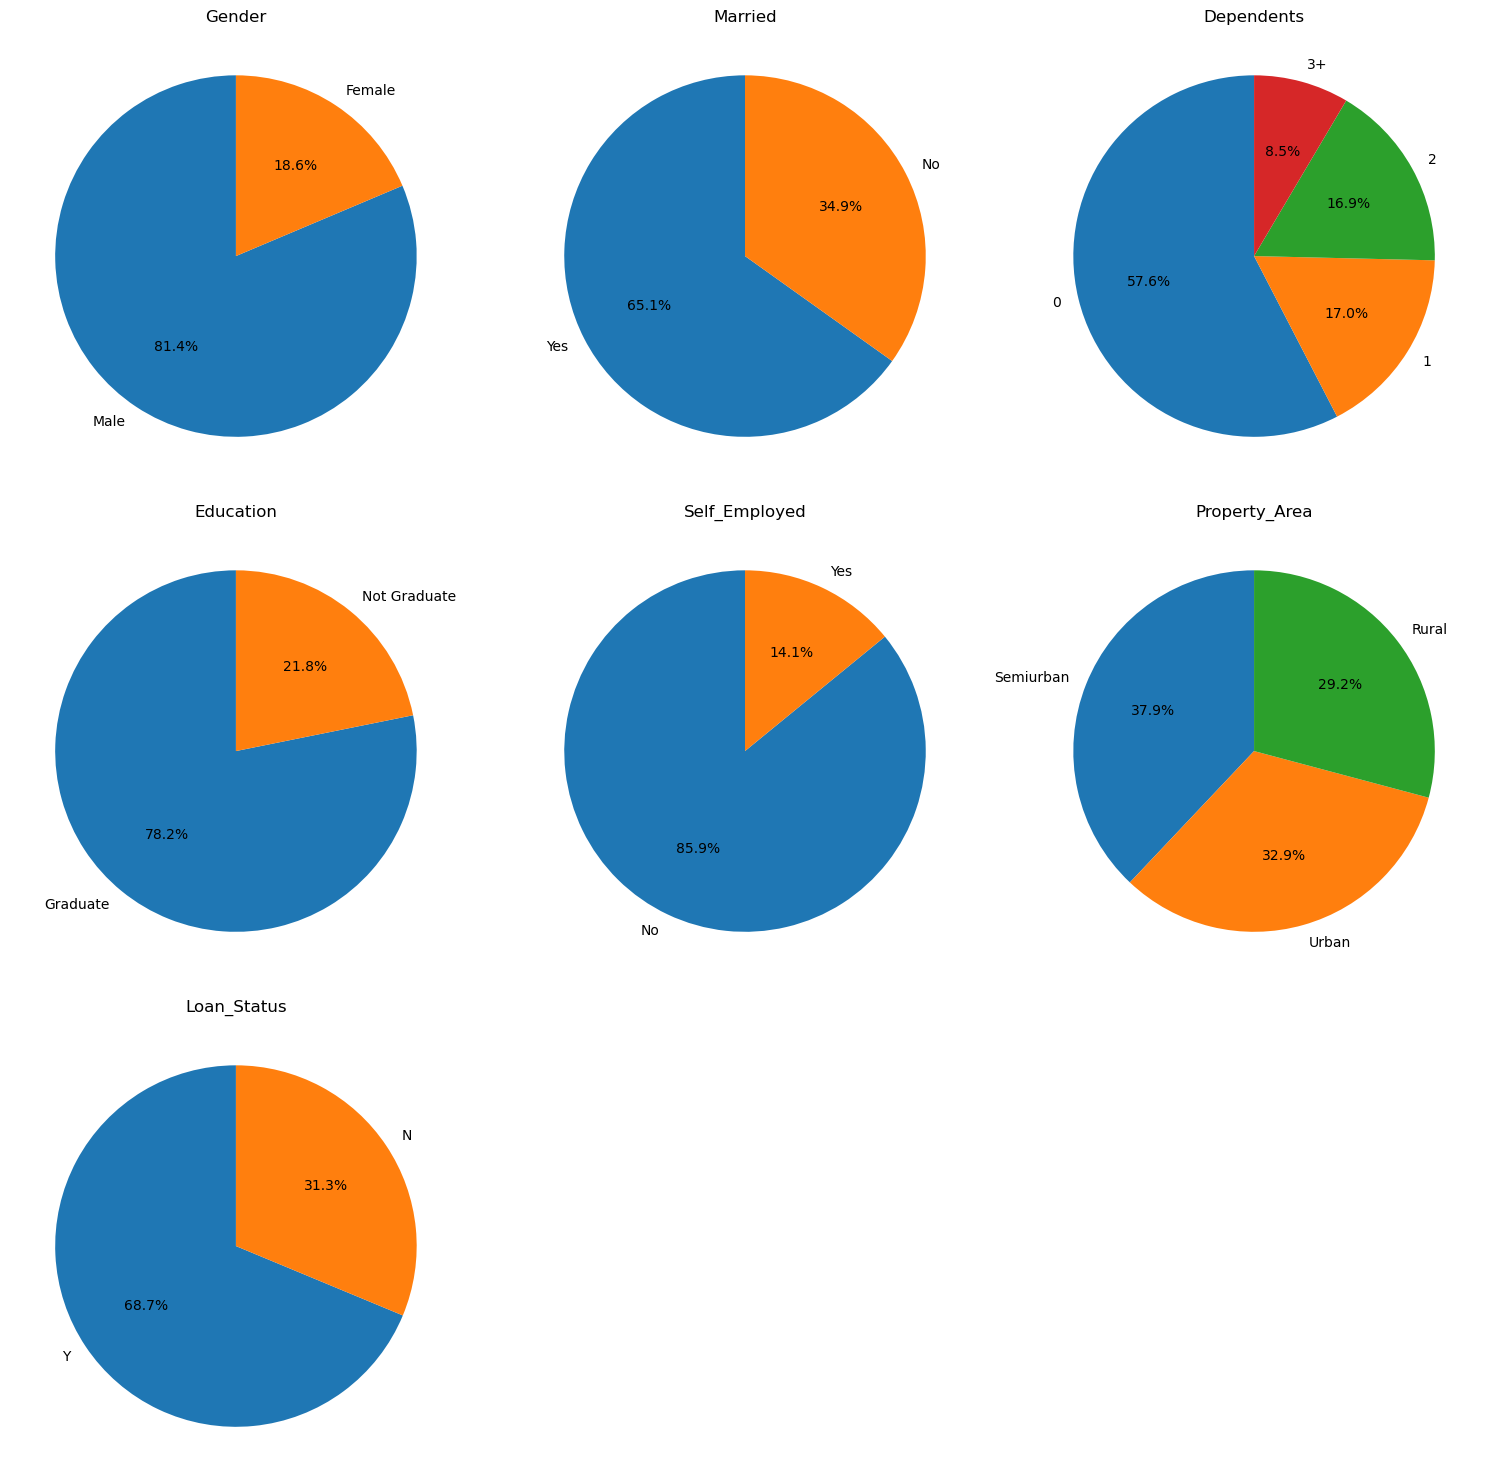

In [22]:
max=5

cat_cols=loan.select_dtypes(include='object').keys().to_list()

num_col=len(cat_cols)
num_rows=(num_col +2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    if i<len(ax):
        cat_count=loan[column].value_counts()
        
        if len(cat_count)>max:
            cat_count_top=cat_count[:max]
            cat_count_others=pd.Series(cat_count[max:].sum(),index=['Others'])
            cat_count=cat_count_top.append(cat_count_others)
            
            
        ax[i].pie(cat_count,labels=cat_count.index,autopct="%0.1f%%",startangle=90)
        ax[i].set_title(column)
        
        
if num_col < len(ax):
    for i in range(num_col,len(ax)):
        fig.delaxes(ax[i])
        
        
fig.tight_layout()
    

# Missing Values Analysis

In [6]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
cat_cols=loan.select_dtypes(include='object').columns.to_list()
numerical_cols=loan.select_dtypes(include=['int','float']).columns.to_list()
for i in cat_cols:
    i_mode=loan[i].mode()[0]
    loan[i].fillna(i_mode,inplace=True)
    
for i in numerical_cols:
    i_median=loan[i].median()
    loan[i].fillna(i_median,inplace=True)

In [9]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting Categorical Columns to Numerical Columns

In [10]:
cat_cols=loan.select_dtypes(include='object').columns.to_list()
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in cat_cols:
    loan[i]=LE.fit_transform(loan[i])

In [10]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
loan.corr()["Loan_Status"]

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<Axes: >

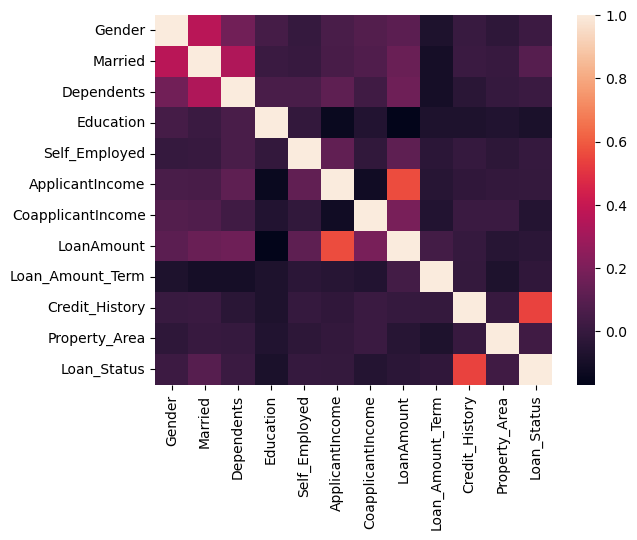

In [15]:
sns.heatmap(loan.corr())

# Model Development Without Hyper-Parameter Tuning

## 1) Logistic Regression

Accuracy is :  0.827027027027027
F-1 score is  :  0.8911564625850339
Precision is :  0.81875
Recall is :  0.9776119402985075


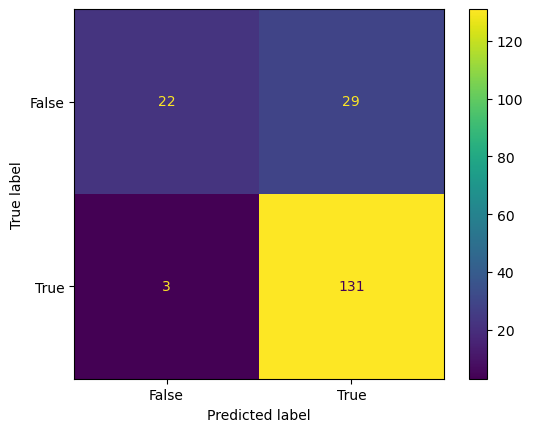

True Negative :  22
False Positive :  29
False Negative :  3
True Positive :  131


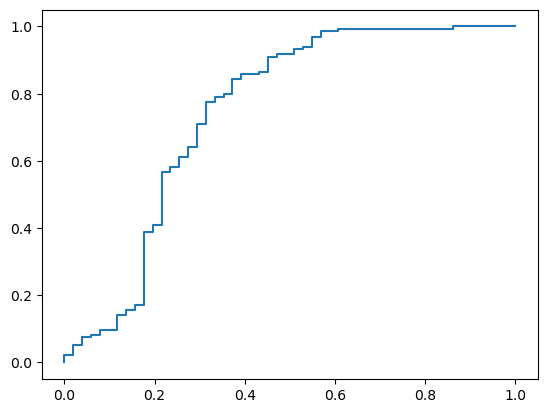

In [11]:
import warnings
warnings.filterwarnings("ignore")



X=loan.drop("Loan_Status",axis=1)
y=loan[['Loan_Status']]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)



from scipy import stats

select_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

z_score=np.abs(stats.zscore(X_train[select_columns]))

threshold=3

outlier_indices=np.where(z_score > threshold)[0]

X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
lr_acc=accuracy_score(y_test,y_pred_lr)
lr_f1=f1_score(y_test,y_pred_lr)
lr_precision=precision_score(y_test,y_pred_lr)
lr_recall=recall_score(y_test,y_pred_lr)

print ("Accuracy is : ",lr_acc)
print("F-1 score is  : ",lr_f1)
print("Precision is : ",lr_precision)
print("Recall is : ",lr_recall)

cmd=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_lr_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_lr_prob)
plt.plot(fpr,tpr)
plt.show()


## 2) Decision Tree

Accuracy is :  0.7297297297297297
F-1 Score is :  0.8076923076923077
Recall is :  0.7835820895522388
Precision is :  0.8333333333333334


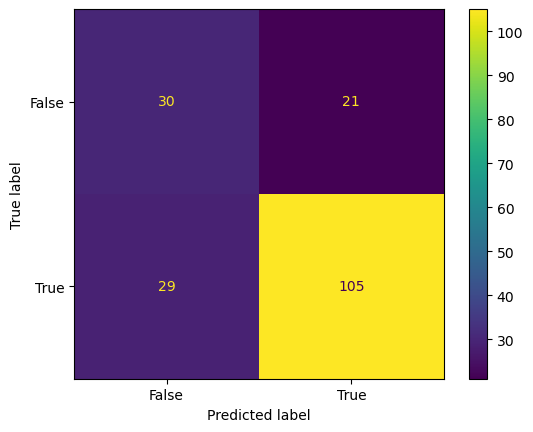

True Negative :  30
False Positive :  21
False Negative :  29
True Positive :  105


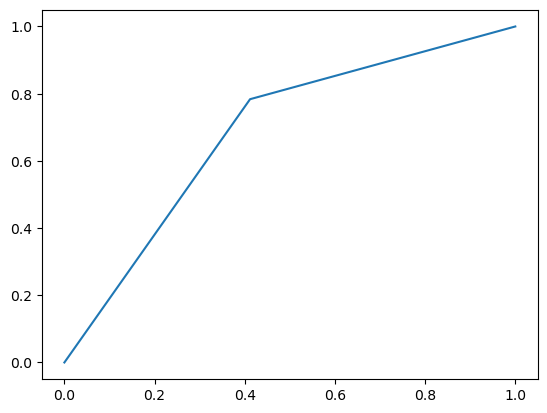

In [12]:
import warnings
warnings.filterwarnings("ignore")

X=loan.drop("Loan_Status",axis=1)
y=loan[["Loan_Status"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

from scipy import stats
select_columns= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
z_score= np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])


from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt=dt.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_f1=f1_score(y_test,y_pred_dt)
dt_recall=recall_score(y_test,y_pred_dt)
dt_precision=precision_score(y_test,y_pred_dt)

print("Accuracy is : ",dt_acc)
print("F-1 Score is : ",dt_f1)
print("Recall is : ",dt_recall)
print("Precision is : ",dt_precision)

cmd=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_dt_prob=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_dt_prob)
plt.plot(fpr,tpr)
plt.show()

## 3) Navie Bayes

Accuracy is :  0.8324324324324325
F-1 score is :  0.8949152542372881
Precision is :  0.8198757763975155
Recall is :  0.9850746268656716


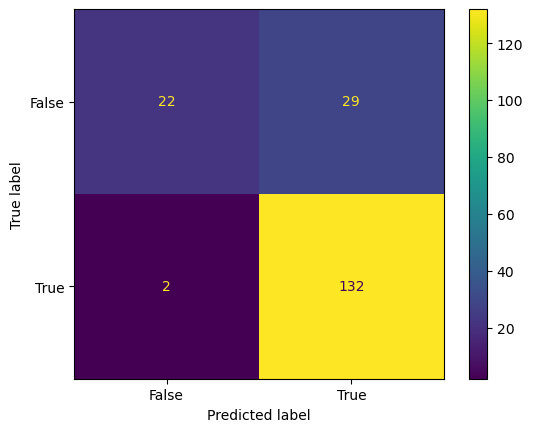

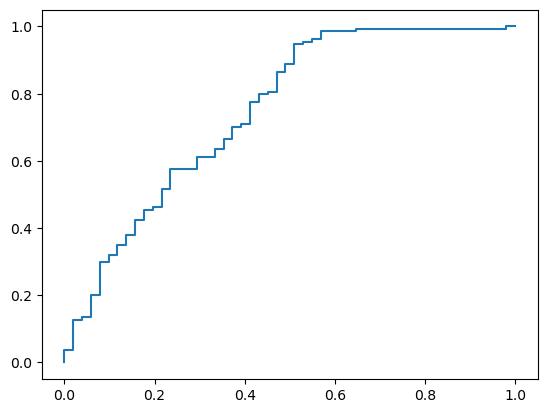

In [13]:
import warnings
warnings.filterwarnings("ignore")

X=loan.drop("Loan_Status",axis=1)
y=loan[["Loan_Status"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

from scipy import stats
select_column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
z_score=np.abs(stats.zscore(X_train[select_column]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb=nb.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
nb_acc=accuracy_score(y_test,y_pred_nb)
nb_f1=f1_score(y_test,y_pred_nb)
nb_precision=precision_score(y_test,y_pred_nb)
nb_recall=recall_score(y_test,y_pred_nb)

print("Accuracy is : ",nb_acc)
print("F-1 score is : ",nb_f1)
print("Precision is : ",nb_precision)
print("Recall is : ",nb_recall)

cmd=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

y_pred_nb_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_nb_prob)
plt.plot(fpr,tpr)
plt.show()

## 4) KNN

Accuracy is :  0.6216216216216216
F-1 Score is :  0.7482014388489208
Recall is :  0.7761194029850746
Precision is :  0.7222222222222222


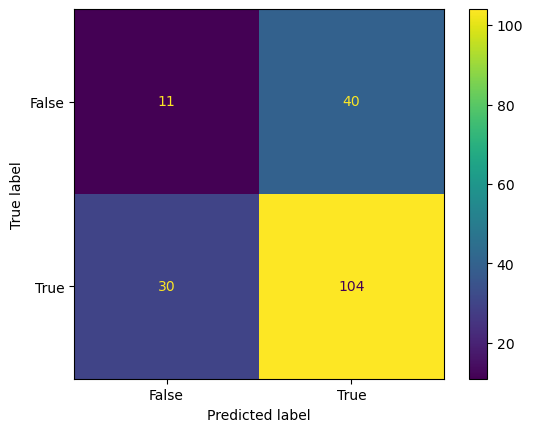

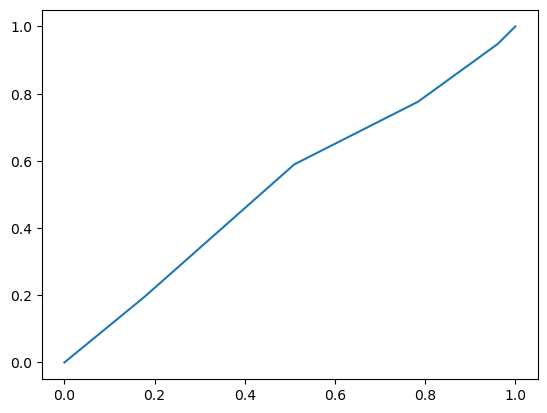

In [14]:
import warnings
warnings.filterwarnings("ignore")

X=loan.drop("Loan_Status",axis=1)
y=loan[['Loan_Status']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

from scipy import stats
select_column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
z_score=np.abs(stats.zscore(X_train[select_column]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_f1=f1_score(y_test,y_pred_knn)
knn_recall=recall_score(y_test,y_pred_knn)
knn_precision=precision_score(y_test,y_pred_knn)

print("Accuracy is : ",knn_acc)
print("F-1 Score is : ",knn_f1)
print("Recall is : ",knn_recall)
print("Precision is : ",knn_precision)

cmd=confusion_matrix(y_test,y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

y_pred_knn_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn_prob)
plt.plot(fpr,tpr)
plt.show()

## 5) Random Forest

Accuracy is :  0.8
F-1 Score is :  0.8710801393728224
Recall is :  0.9328358208955224
Precision is :  0.8169934640522876


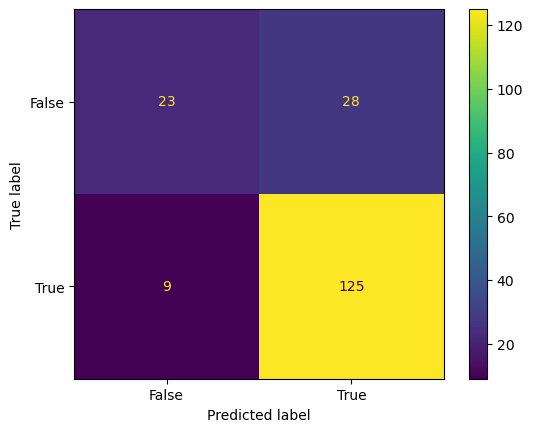

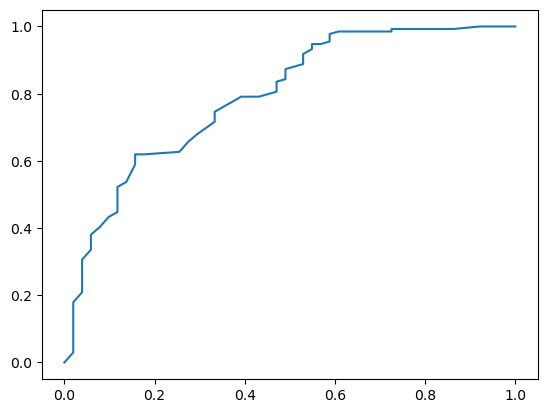

In [15]:
import warnings
warnings.filterwarnings("ignore")

X=loan.drop("Loan_Status",axis=1)
y=loan[["Loan_Status"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

from scipy import stats
select_column=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
z_score=np.abs(stats.zscore(X_train[select_column]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_f1=f1_score(y_test,y_pred_rf)
rf_recall=recall_score(y_test,y_pred_rf)
rf_precision=precision_score(y_test,y_pred_rf)

print("Accuracy is : ",rf_acc)
print("F-1 Score is : ",rf_f1)
print("Recall is : ",rf_recall)
print("Precision is : ",rf_precision)

cmd=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

y_pred_rf_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_prob)
plt.plot(fpr,tpr)
plt.show()

In [16]:
dict1={'Accuracy' : [dt_acc,lr_acc,nb_acc,knn_acc,rf_acc],
    'Precision': [dt_precision,lr_precision,nb_precision,knn_precision,rf_precision],
    'Recall'   : [dt_recall,lr_recall,nb_recall,knn_recall,rf_recall],
    'F-1 Score': [dt_f1,lr_f1,nb_f1,knn_f1,rf_f1]}

In [17]:
without_hyperparameter_tuning_df=pd.DataFrame(dict1,index=['Decision Tree','Logistic Regression','Navie Bayes','KNN','Random Forest'])
without_hyperparameter_tuning_df

,Accuracy,Precision,Recall,F-1 Score
Decision Tree,0.729730,0.833333,0.783582,0.807692
Logistic Regression,0.827027,0.818750,0.977612,0.891156
Navie Bayes,0.832432,0.819876,0.985075,0.894915
KNN,0.621622,0.722222,0.776119,0.748201
Random Forest,0.800000,0.816993,0.932836,0.871080


# Model Development with Hyper Parameter Tuning

## 1) Decision Tree

In [18]:
from sklearn.model_selection import GridSearchCV
grid_tree=DecisionTreeClassifier()

dt_param=[i for i in grid_tree.get_params()]
print("Available Parameters are : ",dt_param)

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
print("==================================================================")
print("Processing Parameters are : ",param_grid)
grid_search=GridSearchCV(grid_tree,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_score=grid_search.best_score_
print("Best Parameters are : ",best_parameters)
print("Best Score is : ",best_score)

Available Parameters are :  ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
Processing Parameters are :  {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters are :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best Score is :  0.7979524239686842


Accuracy is :  0.7891891891891892
F1 score is :  0.8704318936877076
Recall score is :  0.9776119402985075
Precision is :  0.7844311377245509


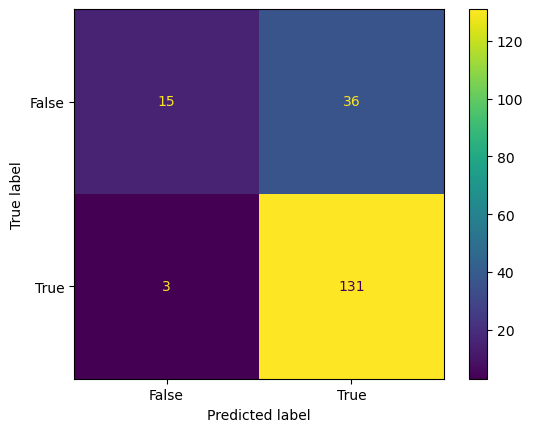

True Negative :  15
False Positive :  36
False Negative :  3
True Positive :  131


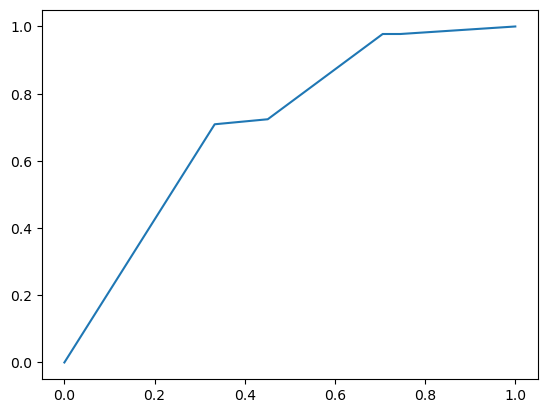

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, min_samples_leaf= 1, min_samples_split= 2, random_state=42)
dt.fit(X_train,y_train)

y_pred_dt=dt.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_f1=f1_score(y_test,y_pred_dt)
dt_recall=recall_score(y_test,y_pred_dt)
dt_precision=precision_score(y_test,y_pred_dt)

print("Accuracy is : ",dt_acc)
print("F1 score is : ",dt_f1)
print("Recall score is : ",dt_recall)
print("Precision is : ",dt_precision)

cmd=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_dt_prob=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_dt_prob)
plt.plot(fpr,tpr)
plt.show()

## 2) Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV
grid_forest=RandomForestClassifier()

avail_param=[i for i in grid_forest.get_params()]
print("Available Parameters are : ",avail_param)
print("===============================================================")
param={
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8,9],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}
print("Processing Parameters are : ",param)
grid_searh=GridSearchCV(grid_forest,param,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)
print("The best parameters are : ",grid_search.best_params_)
print("The Best Score is : ",grid_search.best_score_)

Available Parameters are :  ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
Processing Parameters are :  {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'n_estimators': [100, 200], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
The best parameters are :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
The Best Score is :  0.7979524239686842


Accuracy is :  0.827027027027027
F1 score is :  0.8918918918918919
Recall score is :  0.9850746268656716
Precision is :  0.8148148148148148


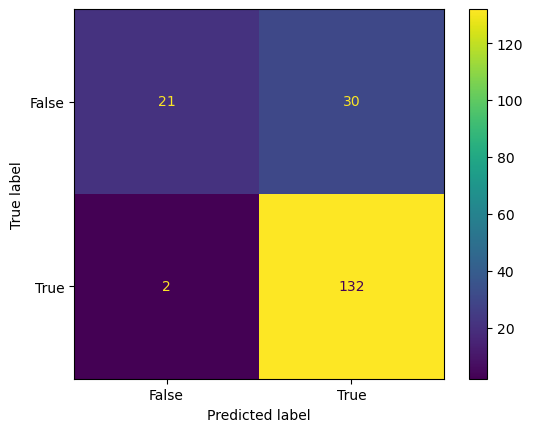

True Negative :  21
False Positive :  30
False Negative :  2
True Positive :  132


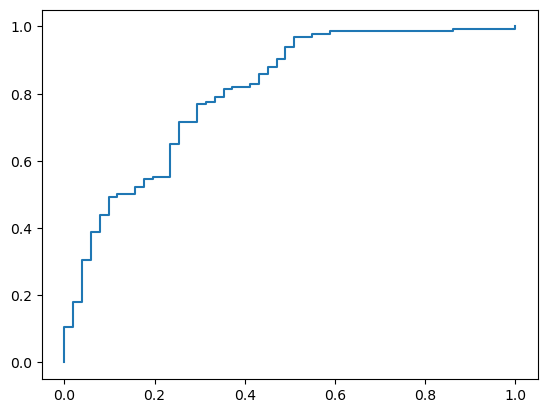

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', max_depth= 3, min_samples_leaf=1, min_samples_split=2, random_state= 42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_f1=f1_score(y_test,y_pred_rf)
rf_recall=recall_score(y_test,y_pred_rf)
rf_precision=precision_score(y_test,y_pred_rf)

print("Accuracy is : ",rf_acc)
print("F1 score is : ",rf_f1)
print("Recall score is : ",rf_recall)
print("Precision is : ",rf_precision)

cmd=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_rf).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_rf_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_prob)
plt.plot(fpr,tpr)
plt.show()

## 3) KNN

In [22]:
from sklearn.model_selection import GridSearchCV
grid_knn=KNeighborsClassifier()
avail_param=[i for i in grid_knn.get_params()]
print("The Availabe Parameters are : ",avail_param)
print("=========================================================================")
param={
    'algorithm':['auto', 'ball_tree', 'kd_te'],
    "n_neighbors":[5,6,7,10],
    "leaf_size":[20,30,40,50]
}
grid_search=GridSearchCV(grid_knn,param,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)
print("the Best parameters are : ",grid_search.best_params_)
print("The best score is : ",grid_search.best_score_)

The Availabe Parameters are :  ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
the Best parameters are :  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10}
The best score is :  0.662571514604035


Accuracy is :  0.6378378378378379
F1 score is :  0.7697594501718212
Recall score is :  0.835820895522388
Precision is :  0.7133757961783439


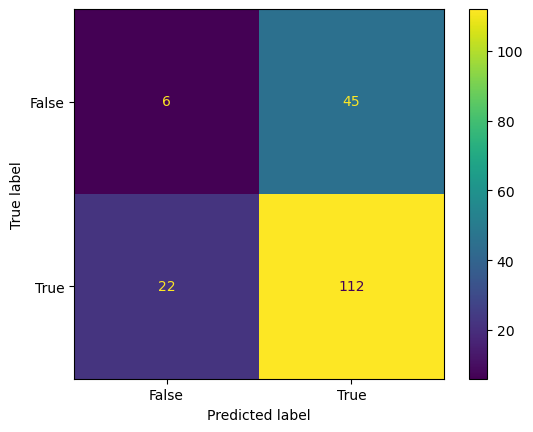

True Negative :  6
False Positive :  45
False Negative :  22
True Positive :  112


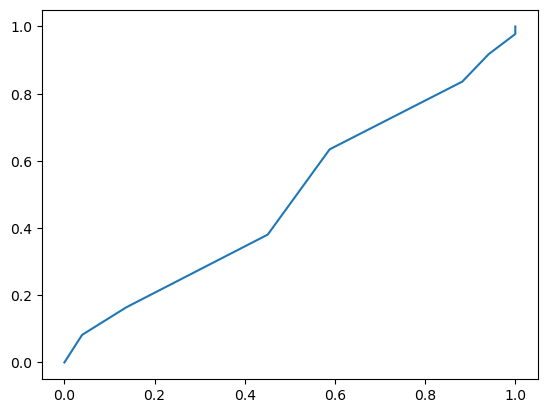

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size=20, n_neighbors=10)
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_f1=f1_score(y_test,y_pred_knn)
knn_recall=recall_score(y_test,y_pred_knn)
knn_precision=precision_score(y_test,y_pred_knn)

print("Accuracy is : ",knn_acc)
print("F1 score is : ",knn_f1)
print("Recall score is : ",knn_recall)
print("Precision is : ",knn_precision)

cmd=confusion_matrix(y_test,y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_knn).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_knn_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn_prob)
plt.plot(fpr,tpr)
plt.show()

## 4) Navie Bayes

In [24]:
from sklearn.model_selection import GridSearchCV
grid_nb=GaussianNB()
print("Available Parameters are : ",grid_nb.get_params())

print("===================================================================")

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search=GridSearchCV(grid_nb,param_grid,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)

print("The best parameters are  : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'priors': None, 'var_smoothing': 1e-09}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are  :  {'var_smoothing': 6.579332246575682e-09}
The Best score is :  0.8102679915688047


Accuracy score is :  0.8324324324324325
F-1 score is :  0.8949152542372881
Recall score is :  0.9850746268656716
Precision score is :  0.8198757763975155


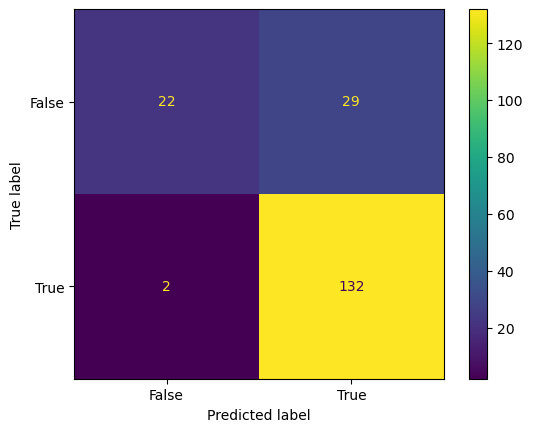

True Negative :  22
False Positive :  29
False Negative :  2
True Positive :  132


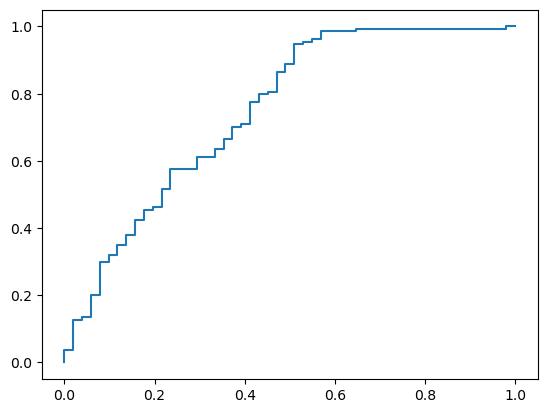

In [25]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=1e-09)

nb.fit(X_train,y_train)

y_pred_nb=nb.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
nb_acc=accuracy_score(y_test,y_pred_nb)
nb_f1=f1_score(y_test,y_pred_nb)
nb_recall=recall_score(y_test,y_pred_nb)
nb_precision=precision_score(y_test,y_pred_nb)

print("Accuracy score is : ",nb_acc)
print("F-1 score is : ",nb_f1)
print("Recall score is : ",nb_recall)
print("Precision score is : ",nb_precision)

cmd=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_nb).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_nb_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_nb_prob)
plt.plot(fpr,tpr)
plt.show()

## 5) Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV
grid_lr=LogisticRegression()

print("Available Parameters are : ",grid_lr.get_params())
print("=========================================================")

param_grid={
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_search=GridSearchCV(grid_lr,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)

print("The best parameters are : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best parameters are :  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
The Best score is :  0.8102679915688047


Accuracy score is :  0.827027027027027
F-1 score is :  0.8911564625850339
Recall score is :  0.9776119402985075
Precision score is :  0.81875


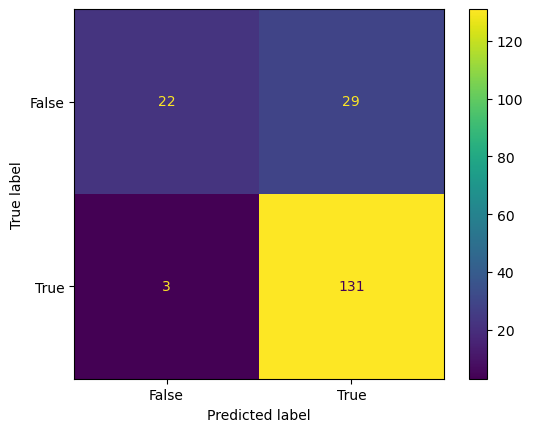

True Negative :  22
False Positive :  29
False Negative :  3
True Positive :  131


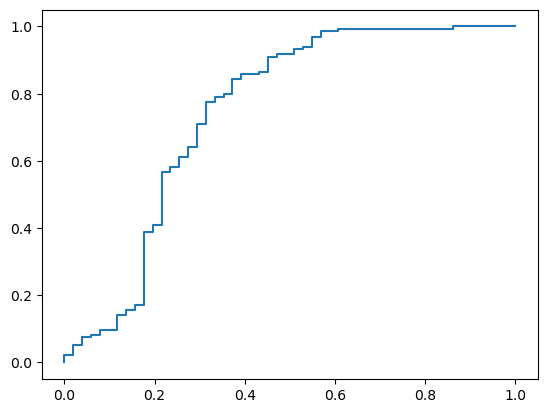

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
lr_acc=accuracy_score(y_test,y_pred_lr)
lr_f1=f1_score(y_test,y_pred_lr)
lr_recall=recall_score(y_test,y_pred_lr)
lr_precision=precision_score(y_test,y_pred_lr)

print("Accuracy score is : ",lr_acc)
print("F-1 score is : ",lr_f1)
print("Recall score is : ",lr_recall)
print("Precision score is : ",lr_precision)

cmd=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_lr_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_lr_prob)
plt.plot(fpr,tpr)
plt.show()


In [28]:
dict2={'Accuracy':[dt_acc,knn_acc,lr_acc,nb_acc,rf_acc],
        'Precssion':[dt_precision,knn_precision,lr_precision,nb_precision,rf_precision],
          'Recall':[dt_recall,knn_recall,lr_recall,nb_recall,rf_recall],
              'F1-score':[dt_f1,knn_f1,lr_f1,nb_f1,rf_f1]}

In [29]:
with_hyperparameter_tuning_df=pd.DataFrame(dict2,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])
with_hyperparameter_tuning_df

,Accuracy,Precssion,Recall,F1-score
DT,0.789189,0.784431,0.977612,0.870432
KNN,0.637838,0.713376,0.835821,0.769759
Logistic,0.827027,0.818750,0.977612,0.891156
Naive Bayes,0.832432,0.819876,0.985075,0.894915
Random Forest,0.827027,0.814815,0.985075,0.891892


In [74]:
without_hyperparameter_tuning_df

,Accuracy,Precision,Recall,F-1 Score
Decision Tree,0.735135,0.840000,0.783582,0.810811
Logistic Regression,0.827027,0.818750,0.977612,0.891156
Navie Bayes,0.832432,0.819876,0.985075,0.894915
KNN,0.621622,0.722222,0.776119,0.748201
Random Forest,0.810811,0.815287,0.955224,0.879725


# Saving the Model using Pickle

In [30]:
import pickle
pickle.dump(rf,open("loan_prediction.pkl",'wb'))

In [31]:
model=pickle.load(open("loan_prediction.pkl",'rb'))
model

RandomForestClassifier(max_depth=3, random_state=42)